# Pre-processing

Data preprocessing is an important task. It is a data mining technique that transforms raw data into a more understandable, useful and efficient format.

**Why is data preprocessing required?**

Real world data is generally:
- *Incomplete:* Certain attributes or values or both are missing or only aggregate data is available.
- *Noisy:* Data contains errors or outliers
- *Inconsistent:* Data contains differences in codes or names etc.

**Tasks in data preprocessing:**
1. **Data Cleaning:** It is also known as scrubbing. This task involves filling of missing values, smoothing or removing noisy data and outliers along with resolving inconsistencies.
2. **Data Integration:** This task involves integrating data from multiple sources such as databases (relational and non-relational), data cubes, files, etc. The data sources can be homogeneous or heterogeneous. The data obtained from the sources can be structured, unstructured or semi-structured in format.
3. **Data Transformation:** This involves normalisation and aggregation of data according to the needs of the data set.
4. **Data Reduction:** During this step data is reduced. The number of records or the number of attributes or dimensions can be reduced. Reduction is performed by keeping in mind that reduced data should produce the same results as original data.
5. **Data Discretization:** It is considered as a part of data reduction. The numerical attributes are replaced with nominal ones.

## Data Cleaning

The data cleaning process detects and removes the errors and inconsistencies present in the data and improves its quality. Data quality problems occur due to misspellings during data entry, missing values or any other invalid data. Basically, “dirty” data is transformed into clean data. “Dirty” data does not produce the accurate and good results. Garbage data gives garbage out. So it becomes very important to handle this data. Professionals spend a lot of their time on this step.

The different ways to handle missing data are:
1. Ignore the data row.
2. Fill the missing values manually.
3. Use attribute mean or median.
4. Use similarity between objects
6. Use forward fill or backward fill method.
7. Use a data-mining algorithm to predict the most probable value.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

## The Data:

In [52]:
df_seq = pd.read_csv(r'pdb_data_seq.csv')
df_char = pd.read_csv(r'pdb_data_no_dups.csv')
df_seq

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
...,...,...,...,...,...
467299,9XIA,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...,388,Protein
467300,9XIM,A,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein
467301,9XIM,B,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein
467302,9XIM,C,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein


In [54]:
# Filter for only proteins
protein_char = df_char[df_char.macromoleculeType == 'Protein']
protein_seq = df_seq[df_seq.macromoleculeType == 'Protein']
#Select  some variables to join
protein_char = protein_char[['structureId','classification','experimentalTechnique','residueCount', 'resolution',
     'structureMolecularWeight','crystallizationMethod','crystallizationTempK', 'densityMatthews', 'densityPercentSol', 'phValue', 'publicationYear']].copy()


In [55]:
protein_seq.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein
8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
11,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein
12,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [56]:
protein_char.head()

,structureId,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154,2.07,18112.80,NaN,NaN,3.09,60.20,9.0,1999.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,1993.0
5,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154,1.84,18010.64,NaN,NaN,3.09,60.20,9.0,1999.0
7,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,1993.0
8,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154,2.07,18093.78,NaN,NaN,3.09,60.30,9.0,1999.0


In [57]:
protein_seq= protein_seq[['structureId','sequence']]
protein_seq.head()

,structureId,sequence
4,101M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
7,102L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
8,102M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
11,103L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
12,103M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [58]:
# Join two datasets on structureId
model_f =  protein_char.set_index('structureId').join(protein_seq.set_index('structureId'))
model_f.head()

,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear,sequence
structureId,,,,,,,,,,,,
101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154,2.07,18112.80,NaN,NaN,3.09,60.20,9.0,1999.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,1993.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154,1.84,18010.64,NaN,NaN,3.09,60.20,9.0,1999.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,1993.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154,2.07,18093.78,NaN,NaN,3.09,60.30,9.0,1999.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [59]:
model_f.shape

(346325, 12)

**Attribute types, and amount of missing values:**

In [60]:
model_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346325 entries, 101M to 9XIM
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   classification            346324 non-null  object 
 1   experimentalTechnique     346325 non-null  object 
 2   residueCount              346325 non-null  int64  
 3   resolution                330232 non-null  float64
 4   structureMolecularWeight  346325 non-null  float64
 5   crystallizationMethod     240597 non-null  object 
 6   crystallizationTempK      243934 non-null  float64
 7   densityMatthews           307481 non-null  float64
 8   densityPercentSol         307615 non-null  float64
 9   phValue                   259130 non-null  float64
 10  publicationYear           295363 non-null  float64
 11  sequence                  346322 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 34.3+ MB


In [62]:
print(model_f.isnull().sum()) 

classification                   1
experimentalTechnique            0
residueCount                     0
resolution                   16093
structureMolecularWeight         0
crystallizationMethod       105728
crystallizationTempK        102391
densityMatthews              38844
densityPercentSol            38710
phValue                      87195
publicationYear              50962
sequence                         3
dtype: int64


In [63]:
model_f.describe()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
count,346325.000000,330232.000000,3.463250e+05,243934.000000,307481.000000,307615.000000,259130.000000,295363.000000
mean,4708.536765,2.716206,5.516918e+05,291.243141,2.760855,52.817512,6.801273,2010.044315
std,26484.160063,3.083736,3.129940e+06,8.498793,0.738698,10.135556,1.344769,7.652921
min,3.000000,0.480000,4.535500e+02,4.000000,0.000000,0.000000,0.000000,201.000000
25%,398.000000,1.900000,4.541398e+04,291.000000,2.280000,45.820000,6.000000,2006.000000
50%,856.000000,2.300000,9.703276e+04,293.000000,2.570000,52.000000,7.000000,2012.000000
75%,1976.000000,2.800000,2.253119e+05,295.000000,3.030000,59.380000,7.500000,2015.000000
max,313236.000000,70.000000,9.773054e+07,398.000000,13.890000,92.000000,100.000000,2018.000000


# Checking the Missing Mechanisms


<AxesSubplot:>

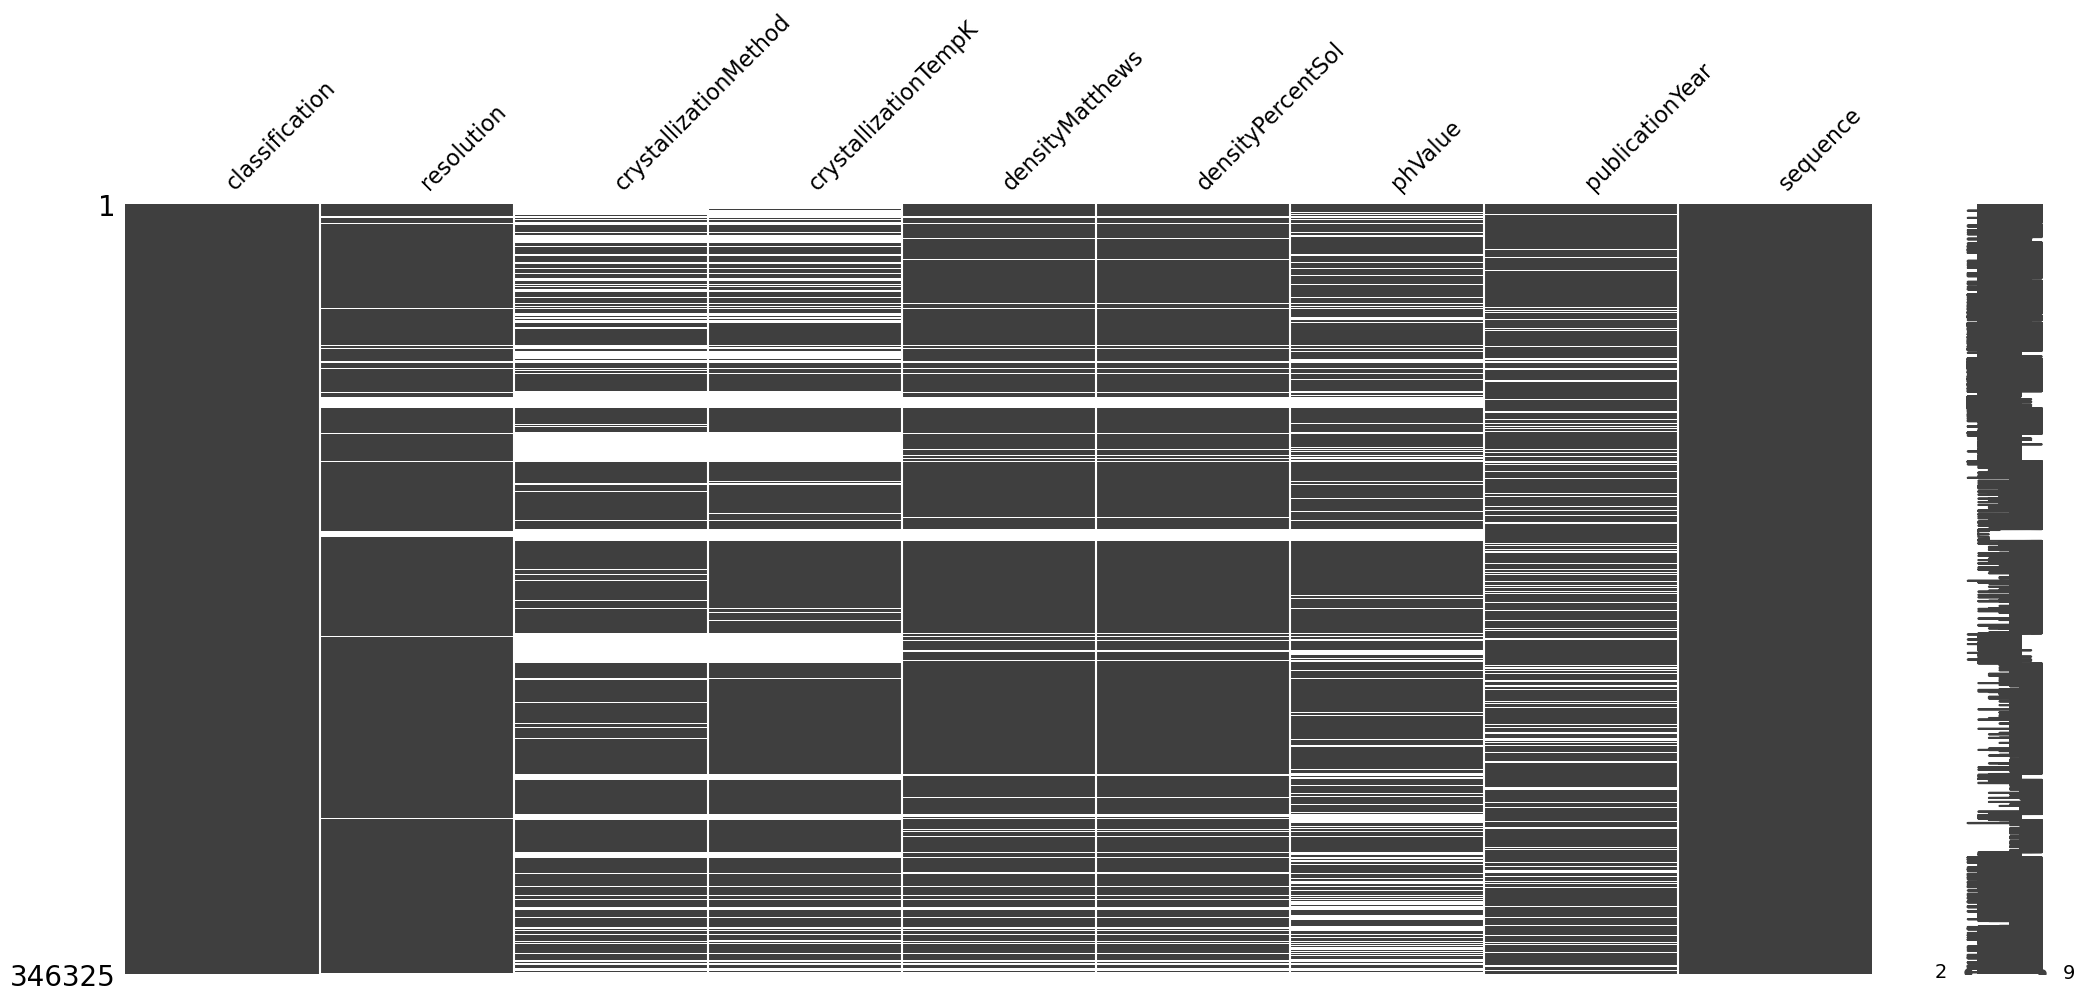

In [64]:
#!pip install missingno
import missingno as msno
### plot the missingness (nullity) matrix
missingdata_df = model_f.columns[model_f.isnull().any()].tolist()  #list of columns with missing values 
msno.matrix(model_f[missingdata_df])

<AxesSubplot:>

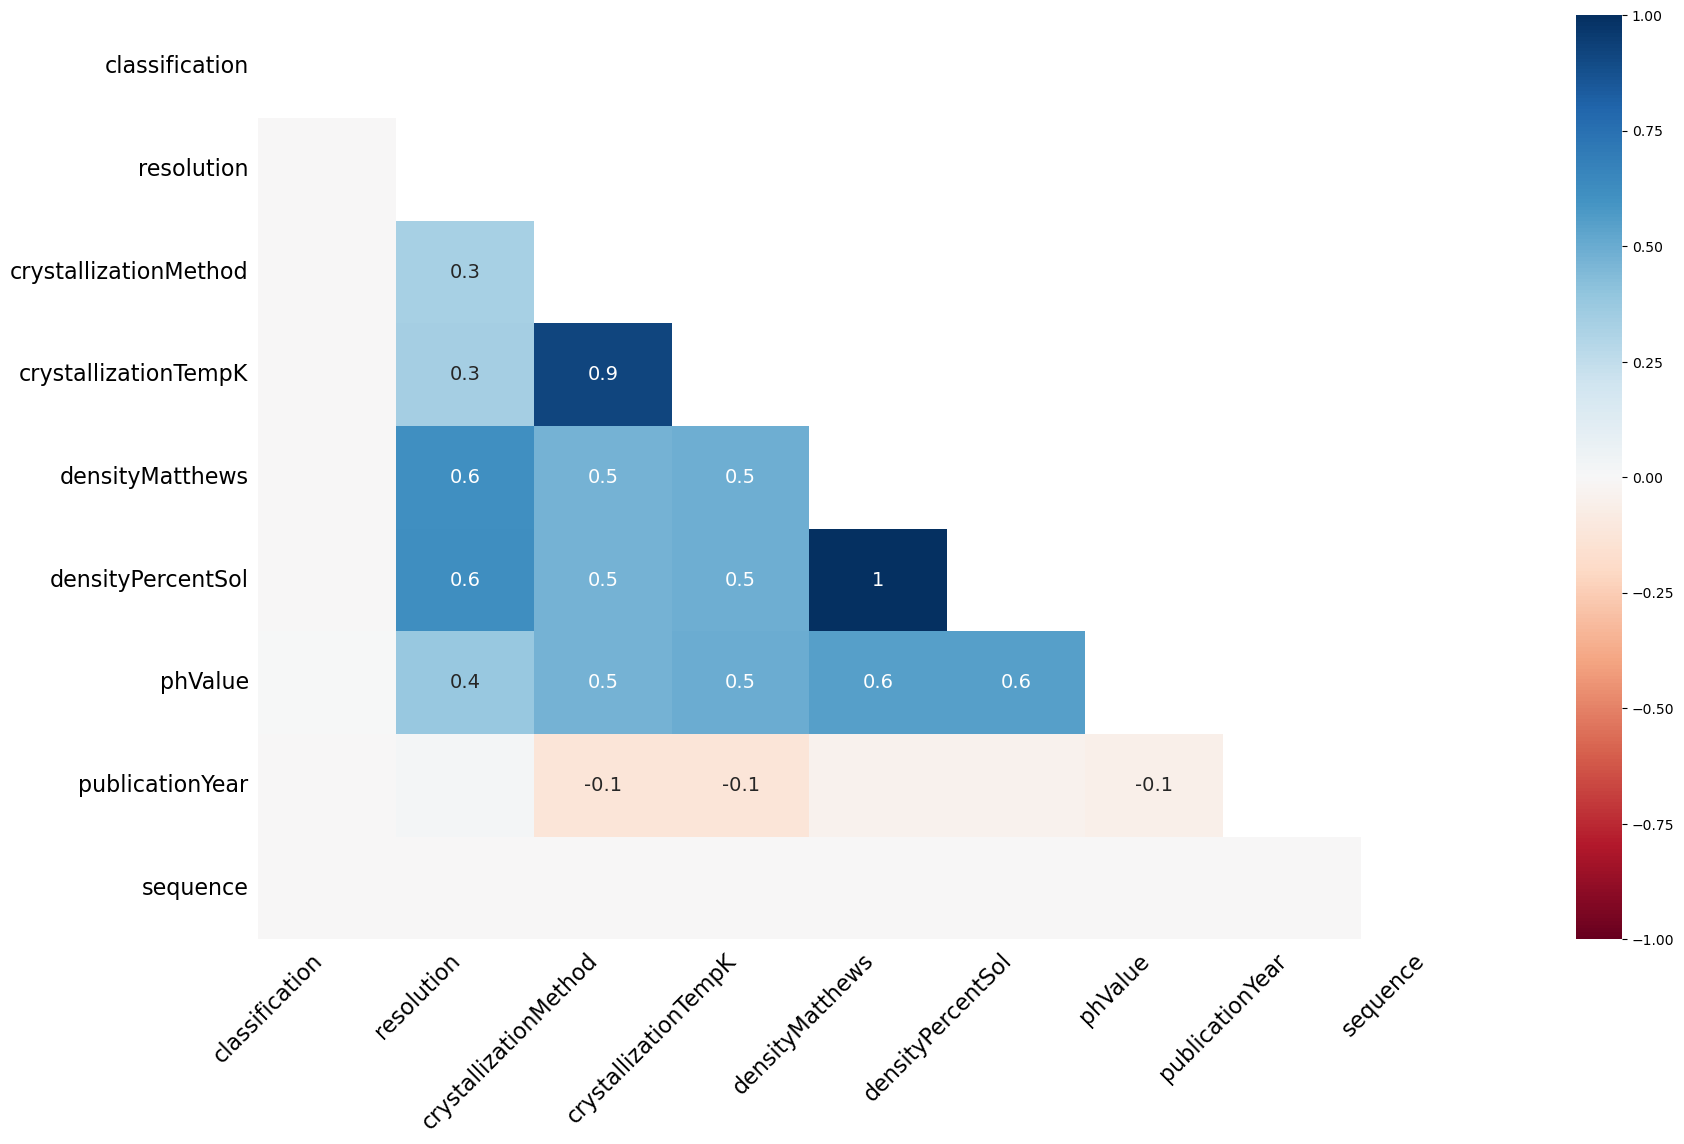

In [65]:
## missingness correlation heatmap

msno.heatmap(model_f[missingdata_df])

# Missing Values Imputation

### 1. Dropout

In [66]:
model_f2 = model_f.copy()
# drop rows with missing values
model_f2.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(model_f2.shape)

(170237, 12)


**From 346325 rows initially, we have 170154 rows now...**

**In order to examine the effect of deleting the missing values, we will use the "describe" function to check the change in mean values and standard deviation:**

In [67]:
model_f.describe()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
count,346325.000000,330232.000000,3.463250e+05,243934.000000,307481.000000,307615.000000,259130.000000,295363.000000
mean,4708.536765,2.716206,5.516918e+05,291.243141,2.760855,52.817512,6.801273,2010.044315
std,26484.160063,3.083736,3.129940e+06,8.498793,0.738698,10.135556,1.344769,7.652921
min,3.000000,0.480000,4.535500e+02,4.000000,0.000000,0.000000,0.000000,201.000000
25%,398.000000,1.900000,4.541398e+04,291.000000,2.280000,45.820000,6.000000,2006.000000
50%,856.000000,2.300000,9.703276e+04,293.000000,2.570000,52.000000,7.000000,2012.000000
75%,1976.000000,2.800000,2.253119e+05,295.000000,3.030000,59.380000,7.500000,2015.000000
max,313236.000000,70.000000,9.773054e+07,398.000000,13.890000,92.000000,100.000000,2018.000000


In [41]:
model_f2.describe()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
count,170237.000000,170237.000000,1.702370e+05,170237.000000,170237.000000,170237.000000,170237.000000,170237.000000
mean,1806.690731,2.337195,2.054701e+05,291.305042,2.793865,53.404706,6.806446,2010.688011
std,2971.476615,0.655708,3.461086e+05,8.926603,0.751980,10.103654,1.375376,4.841658
min,5.000000,0.480000,4.885400e+02,4.000000,0.000000,0.000000,0.000000,1986.000000
25%,436.000000,1.900000,4.907945e+04,291.000000,2.290000,46.120000,6.000000,2007.000000
50%,864.000000,2.250000,9.772414e+04,293.000000,2.590000,52.530000,7.000000,2012.000000
75%,1862.000000,2.700000,2.092386e+05,295.000000,3.100000,60.290000,7.500000,2015.000000
max,57792.000000,9.010000,1.249011e+07,398.000000,12.700000,90.330000,100.000000,2018.000000


**If the mean and standard deviation do not change then the lines can be deleted, and if the values (mean, standard deviation) change significantly then another solution is needed to delete the lines with the missing values.**

## 2. Statistical Imputation
 
**This imply to substitute missing values by a statistical measure. The most commonly used are the mean and the median.**

In [68]:
##### indicate the missing points with one_zero 

model_f_one = model_f.copy()

model_f_one['resolution_na'] = 0 #adding new colomn 
model_f_one.loc[(model_f_one['resolution'].isnull()),['resolution_na']] = 1

**Complete it for the rest of the features:**<br>
crystallizationMethod, crystallizationTempK, densityMatthews, densityPercentSol, phValue, publicationYear

In [69]:
cols =['crystallizationMethod','crystallizationTempK','densityMatthews','densityPercentSol','phValue', 'publicationYear']


for col in cols:
    model_f_one[col+"_na"] = 0 
    model_f_one.loc[(model_f_one[col].isnull()),[col+"_na"]] = 1
    
model_f_one.head() 

,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear,sequence,resolution_na,crystallizationMethod_na,crystallizationTempK_na,densityMatthews_na,densityPercentSol_na,phValue_na,publicationYear_na
structureId,,,,,,,,,,,,,,,,,,,
101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154,2.07,18112.80,NaN,NaN,3.09,60.20,9.0,1999.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,0,1,1,0,0,0,0
102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,1993.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,0,1,1,0,0,1,0
102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154,1.84,18010.64,NaN,NaN,3.09,60.20,9.0,1999.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,0,1,1,0,0,0,0
103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,1993.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,0,1,1,0,0,1,0
103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154,2.07,18093.78,NaN,NaN,3.09,60.30,9.0,1999.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,0,1,1,0,0,0,0


**Find the most common value for the nominal variable:**

In [48]:
counts = model_f_one['crystallizationMethod'].value_counts()
counts

VAPOR DIFFUSION, HANGING DROP                             135626
VAPOR DIFFUSION, SITTING DROP                              75488
VAPOR DIFFUSION                                            13554
MICROBATCH                                                  2559
EVAPORATION                                                 2543
                                                           ...  
vapor diffusion - sitting drop in microgravity                 1
hanging drop and soaking of crystals in UDPGlcA 100 mM         1
vapor diffusion, siting drop                                   1
batch under oil                                                1
Microbatch, Douglas Instrument robot                           1
Name: crystallizationMethod, Length: 526, dtype: int64

In [71]:
counts.index[0] # the most common value

'VAPOR DIFFUSION, HANGING DROP'

In [72]:
model_f_one['crystallizationMethod'] = model_f_one['crystallizationMethod'].fillna(counts.index[0])

model_f_one.head()

,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear,sequence,resolution_na,crystallizationMethod_na,crystallizationTempK_na,densityMatthews_na,densityPercentSol_na,phValue_na,publicationYear_na
structureId,,,,,,,,,,,,,,,,,,,
101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154,2.07,18112.80,"VAPOR DIFFUSION, HANGING DROP",NaN,3.09,60.20,9.0,1999.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,0,1,1,0,0,0,0
102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,165,1.74,18926.61,"VAPOR DIFFUSION, HANGING DROP",NaN,2.75,55.28,NaN,1993.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,0,1,1,0,0,1,0
102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154,1.84,18010.64,"VAPOR DIFFUSION, HANGING DROP",NaN,3.09,60.20,9.0,1999.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,0,1,1,0,0,0,0
103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,167,1.90,19092.72,"VAPOR DIFFUSION, HANGING DROP",NaN,2.70,54.46,NaN,1993.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,0,1,1,0,0,1,0
103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154,2.07,18093.78,"VAPOR DIFFUSION, HANGING DROP",NaN,3.09,60.30,9.0,1999.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,0,1,1,0,0,0,0


**Impute mean for the following vars:**
- Calculate the average of each of the variables.
- Then put the average value in each of the missing values in the column.

In [73]:
cols = ["resolution",
"crystallizationTempK",
"densityMatthews",
"densityPercentSol",
"phValue",
"publicationYear"]

for col in cols:
    mean = model_f_one[col].mean()
    model_f_one[col] = model_f_one[col].fillna(mean)

**Use the "describe" function to examine the effect on the values:**

In [74]:
# summarize the number of rows and columns in the dataset
print(model_f_one.shape)
model_f_one.head()

(346325, 19)


,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear,sequence,resolution_na,crystallizationMethod_na,crystallizationTempK_na,densityMatthews_na,densityPercentSol_na,phValue_na,publicationYear_na
structureId,,,,,,,,,,,,,,,,,,,
101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154,2.07,18112.80,"VAPOR DIFFUSION, HANGING DROP",291.243141,3.09,60.20,9.000000,1999.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,0,1,1,0,0,0,0
102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,165,1.74,18926.61,"VAPOR DIFFUSION, HANGING DROP",291.243141,2.75,55.28,6.801273,1993.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,0,1,1,0,0,1,0
102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154,1.84,18010.64,"VAPOR DIFFUSION, HANGING DROP",291.243141,3.09,60.20,9.000000,1999.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,0,1,1,0,0,0,0
103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,167,1.90,19092.72,"VAPOR DIFFUSION, HANGING DROP",291.243141,2.70,54.46,6.801273,1993.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,0,1,1,0,0,1,0
103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154,2.07,18093.78,"VAPOR DIFFUSION, HANGING DROP",291.243141,3.09,60.30,9.000000,1999.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,0,1,1,0,0,0,0


In [76]:
print(model_f.describe())

        residueCount     resolution  structureMolecularWeight  \
count  346325.000000  330232.000000              3.463250e+05   
mean     4708.536765       2.716206              5.516918e+05   
std     26484.160063       3.083736              3.129940e+06   
min         3.000000       0.480000              4.535500e+02   
25%       398.000000       1.900000              4.541398e+04   
50%       856.000000       2.300000              9.703276e+04   
75%      1976.000000       2.800000              2.253119e+05   
max    313236.000000      70.000000              9.773054e+07   

       crystallizationTempK  densityMatthews  densityPercentSol  \
count         243934.000000    307481.000000      307615.000000   
mean             291.243141         2.760855          52.817512   
std                8.498793         0.738698          10.135556   
min                4.000000         0.000000           0.000000   
25%              291.000000         2.280000          45.820000   
50%         

In [77]:
print(model_f_one.describe())

        residueCount     resolution  structureMolecularWeight  \
count  346325.000000  346325.000000              3.463250e+05   
mean     4708.536765       2.716206              5.516918e+05   
std     26484.160063       3.011236              3.129940e+06   
min         3.000000       0.480000              4.535500e+02   
25%       398.000000       1.900000              4.541398e+04   
50%       856.000000       2.300000              9.703276e+04   
75%      1976.000000       2.750000              2.253119e+05   
max    313236.000000      70.000000              9.773054e+07   

       crystallizationTempK  densityMatthews  densityPercentSol  \
count         346325.000000    346325.000000      346325.000000   
mean             291.243141         2.760855          52.817512   
std                7.132655         0.696039           9.552330   
min                4.000000         0.000000           0.000000   
25%              291.243141         2.310000          46.630000   
50%         

**Have the values of mean and standard deviation changed significantly or can this method be appropriate to perform impotation?**

It can be seen that this method has had the least effect on the values of the mean and standard deviation hence this method seems more suitable for dealing with the missing values.

## 3. Similarity between objects

Creation of two new Dataftames, one with all the rows where the 'Column name' value is missing and one with all the other rows. 

We use only the numerical attributes to the distance calculation.

In [86]:
crystallizationTempK_miss = model_f[model_f['crystallizationTempK'].isnull()].drop(['classification', 'experimentalTechnique','crystallizationMethod','sequence'], axis = 1)
crystallizationTempK_miss.head()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
structureId,,,,,,,,
101M,154,2.07,18112.80,NaN,3.09,60.20,9.0,1999.0
102L,165,1.74,18926.61,NaN,2.75,55.28,NaN,1993.0
102M,154,1.84,18010.64,NaN,3.09,60.20,9.0,1999.0
103L,167,1.90,19092.72,NaN,2.70,54.46,NaN,1993.0
103M,154,2.07,18093.78,NaN,3.09,60.30,9.0,1999.0


In [91]:
df_exist = model_f[model_f['crystallizationTempK'].notnull()].drop(['classification', 'experimentalTechnique','crystallizationMethod','sequence'], axis = 1)
df_exist.head()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
structureId,,,,,,,,
1914,232,2.53,26562.73,277.0,3.00,34.00,7.7,1997.0
1A04,430,2.20,47657.25,277.0,2.49,51.03,7.6,1998.0
1A04,430,2.20,47657.25,277.0,2.49,51.03,7.6,1998.0
1A07,222,2.20,25718.97,277.0,2.10,43.00,8.0,1997.0
1A07,222,2.20,25718.97,277.0,2.10,43.00,8.0,1997.0


In [93]:
df_exist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243934 entries, 1914 to 6FJ9
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   residueCount              243934 non-null  int64  
 1   resolution                243841 non-null  float64
 2   structureMolecularWeight  243934 non-null  float64
 3   crystallizationTempK      243934 non-null  float64
 4   densityMatthews           240887 non-null  float64
 5   densityPercentSol         240933 non-null  float64
 6   phValue                   216757 non-null  float64
 7   publicationYear           200688 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 16.7+ MB


In [95]:
crystallizationTempK_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102391 entries, 101M to 9XIM
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   residueCount              102391 non-null  int64  
 1   resolution                86391 non-null   float64
 2   structureMolecularWeight  102391 non-null  float64
 3   crystallizationTempK      0 non-null       float64
 4   densityMatthews           66594 non-null   float64
 5   densityPercentSol         66682 non-null   float64
 6   phValue                   42373 non-null   float64
 7   publicationYear           94675 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 7.0+ MB


**Filling the missing values with zeros:**

In [96]:
for attribute in  df_exist.columns:
    print(attribute)
    df_exist[attribute] = df_exist[attribute].fillna(0)
    crystallizationTempK_miss[attribute] = crystallizationTempK_miss[attribute].fillna(0)

residueCount
resolution
structureMolecularWeight
crystallizationTempK
densityMatthews
densityPercentSol
phValue
publicationYear


In [97]:
df_exist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243934 entries, 1914 to 6FJ9
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   residueCount              243934 non-null  int64  
 1   resolution                243934 non-null  float64
 2   structureMolecularWeight  243934 non-null  float64
 3   crystallizationTempK      243934 non-null  float64
 4   densityMatthews           243934 non-null  float64
 5   densityPercentSol         243934 non-null  float64
 6   phValue                   243934 non-null  float64
 7   publicationYear           243934 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 16.7+ MB


### Compute euclidean distance between each row in "crystallizationTempK_miss" to all the row in "df_exist".

**To calculate the Euclidean distances, a smaller amount of data must be used, since there is not enough memory in the computer to perform this calculation.**

In [98]:
miss_100  = crystallizationTempK_miss.iloc[0:100]
miss_100

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
structureId,,,,,,,,
101M,154,2.07,18112.80,0.0,3.09,60.20,9.0,1999.0
102L,165,1.74,18926.61,0.0,2.75,55.28,0.0,1993.0
102M,154,1.84,18010.64,0.0,3.09,60.20,9.0,1999.0
103L,167,1.90,19092.72,0.0,2.70,54.46,0.0,1993.0
103M,154,2.07,18093.78,0.0,3.09,60.30,9.0,1999.0
...,...,...,...,...,...,...,...,...
155L,164,1.85,18809.51,0.0,2.79,55.96,0.0,1995.0
156L,164,1.80,18739.39,0.0,2.81,56.24,0.0,1995.0
157L,164,1.85,18506.14,0.0,2.84,56.71,0.0,1995.0


In [99]:
exist_100 = df_exist.iloc[0:100]
exist_100

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
structureId,,,,,,,,
1914,232,2.53,26562.73,277.0,3.00,34.00,7.70,1997.0
1A04,430,2.20,47657.25,277.0,2.49,51.03,7.60,1998.0
1A04,430,2.20,47657.25,277.0,2.49,51.03,7.60,1998.0
1A07,222,2.20,25718.97,277.0,2.10,43.00,8.00,1997.0
1A07,222,2.20,25718.97,277.0,2.10,43.00,8.00,1997.0
...,...,...,...,...,...,...,...,...
1AR4,402,1.90,45428.53,277.0,2.05,32.00,6.10,1996.0
1AR4,402,1.90,45428.53,277.0,2.05,32.00,6.10,1996.0
1AR5,402,1.60,45430.34,277.0,2.04,32.20,6.15,1996.0


In [100]:
ary = scipy.spatial.distance.cdist(miss_100, exist_100, metric='euclidean')
ary

array([[ 8454.86974202, 29547.03907718, 29547.03907718, ...,
        27320.08468321, 27320.08468321,  3130.49406634],
       [ 7641.47076612, 28733.1990894 , 28733.1990894 , ...,
        26506.2479794 , 26506.2479794 ,  3941.79728593],
       [ 8556.97078307, 29649.19015809, 29649.19015809, ...,
        27422.23520015, 27422.23520015,  3028.75483447],
       ...,
       [ 8061.67321033, 29153.64125627, 29153.64125627, ...,
        26926.68859896, 26926.68859896,  3522.51303614],
       [ 7814.55234745, 28906.38279847, 28906.38279847, ...,
        26679.43111865, 26679.43111865,  3769.0581213 ],
       [ 7855.57509379, 28947.4291873 , 28947.4291873 , ...,
        26720.47730595, 26720.47730595,  3728.12310846]])

In [101]:
print(ary.shape)

(100, 100)


**Creation of new attribute 'crystallizationTempK_2' that hold the mean 'crystallizationTempK' value of the rows with the minimum distance.**

In [104]:
model_f_distance = model_f.copy()

In [107]:
miss_100.index

Index(['101M', '102L', '102M', '103L', '103M', '104L', '104L', '104M', '105M',
       '106M', '107L', '107M', '108L', '108M', '109L', '109M', '10GS', '10GS',
       '110L', '110M', '111L', '111M', '112L', '112M', '113L', '114L', '115L',
       '117E', '117E', '118L', '119L', '11AS', '11AS', '11BA', '11BA', '11BG',
       '11BG', '11GS', '11GS', '120L', '121P', '122L', '123L', '125L', '126L',
       '127L', '128L', '129L', '12AS', '12AS', '12CA', '12E8', '12E8', '12E8',
       '12E8', '12GS', '12GS', '130L', '131L', '132L', '133L', '134L', '135L',
       '137L', '137L', '138L', '139L', '13GS', '13GS', '13PK', '13PK', '13PK',
       '13PK', '140L', '141L', '142L', '143L', '144L', '145L', '146L', '147L',
       '148L', '148L', '149L', '14GS', '14GS', '150L', '150L', '150L', '150L',
       '151L', '152L', '153L', '154L', '155C', '155L', '156L', '157L', '158L',
       '159L'],
      dtype='object', name='structureId')

In [113]:
#DON'T UNDERSTAND!!!!!!!!!
model_f_distance['crystallizationTempK_2'] = model_f_distance['crystallizationTempK']
for i,j in enumerate(miss_100.index):
    #print(i,j)
    #print(exist_100[ary[i]==ary[i].min()])
    model_f_distance.loc[j,'crystallizationTempK_2'] = model_f_distance.loc[exist_100[ary[i]==ary[i].min()].index]['crystallizationTempK'].mean() 

In [112]:
print(model_f.describe())
print("----------------------------------------------------------------------------------")
print(model_f_distance.describe())

        residueCount     resolution  structureMolecularWeight  \
count  346325.000000  330232.000000              3.463250e+05   
mean     4708.536765       2.716206              5.516918e+05   
std     26484.160063       3.083736              3.129940e+06   
min         3.000000       0.480000              4.535500e+02   
25%       398.000000       1.900000              4.541398e+04   
50%       856.000000       2.300000              9.703276e+04   
75%      1976.000000       2.800000              2.253119e+05   
max    313236.000000      70.000000              9.773054e+07   

       crystallizationTempK  densityMatthews  densityPercentSol  \
count         243934.000000    307481.000000      307615.000000   
mean             291.243141         2.760855          52.817512   
std                8.498793         0.738698          10.135556   
min                4.000000         0.000000           0.000000   
25%              291.000000         2.280000          45.820000   
50%         

**It can be seen that there is a very small change in the values of the mean and standard deviation, so this method can also be used to perform impotation of the values.**

# Outlier Detection
 
### Graphical methods

/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


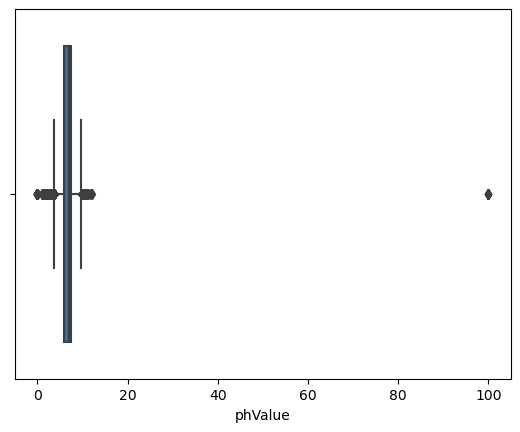

In [114]:
## Using box plot
outl = sns.boxplot(model_f['phValue'])

/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


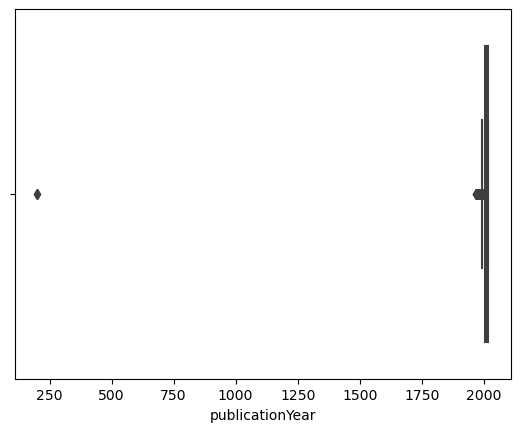

In [115]:
outl = sns.boxplot(model_f['publicationYear'])

It can be seen from the graphs that there are values that are out of range, such as a PH value of 100, or publication year - 201.
From the graphs you can see that there are out-of-range values in each of these columns.

## Using Mathematical Functions

### Z-Score

The z-score or standard score of an observation is a metric that indicates how many standard deviations a data point is from the sample’s mean, assuming a gaussian distribution. This makes z-score a parametric method. Very frequently data points are not to described by a gaussian distribution, this problem can be solved by applying transformations to data ie: scaling it.
Some Python libraries like Scipy and Sci-kit Learn have easy to use functions and classes for a easy implementation along with Pandas and Numpy.

When computing the z-score for each sample on the data set a threshold must be specified. Some good ‘thumb-rule’ thresholds can be: 2.5, 3, 3.5 or more standard deviations.


<img src="./zscore.png" />


**Before using the z score function it is necessary to address the missing values.**

Calculate the Z-value according to the column in which we want to identify out-of-range values.

In [117]:
from scipy import stats
model_f22 = model_f2.iloc[0:10000].copy()
z = np.abs(stats.zscore(model_f22.crystallizationTempK)).values
print(z)


[0.68467101 0.68467101 0.68467101 ... 0.40410009 0.40410009 0.24856136]


**If a particular cross-section is selected, we will see which values appear out of range.
The cross section can be changed according to the data.**

<AxesSubplot:xlabel='structureId', ylabel='crystallizationTempK'>

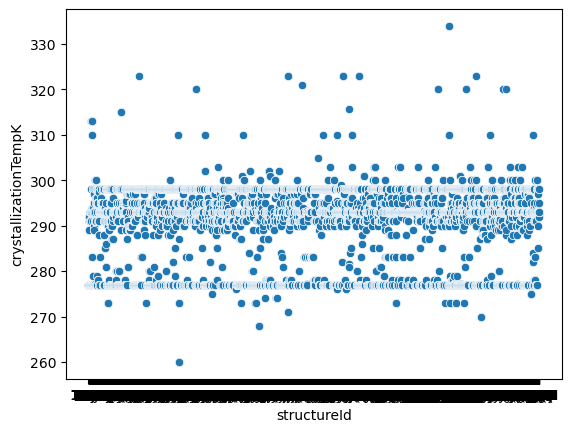

In [53]:
## Eliminating those points

threshold = 2.5
model_f22 = model_f22[(z < threshold)]

sns.scatterplot(x=model_f22.index,y=model_f22['crystallizationTempK'])


<AxesSubplot:xlabel='structureId', ylabel='crystallizationTempK'>

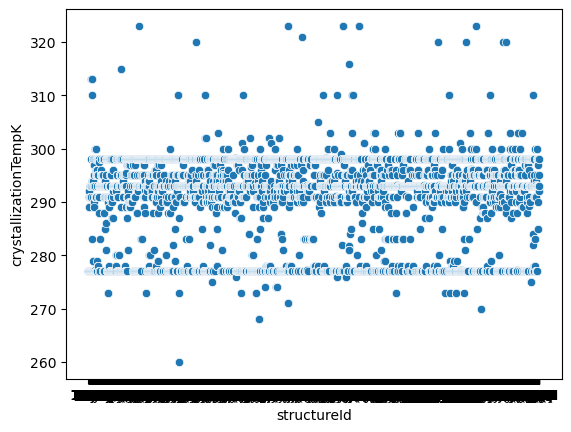

In [54]:
## Eliminating those points
model_f22 = model_f2.iloc[0:10000].copy()
threshold = 2
model_f22 = model_f22[(z < threshold)]

sns.scatterplot(x=model_f22.index,y=model_f22['crystallizationTempK'])


<AxesSubplot:xlabel='structureId', ylabel='crystallizationTempK'>

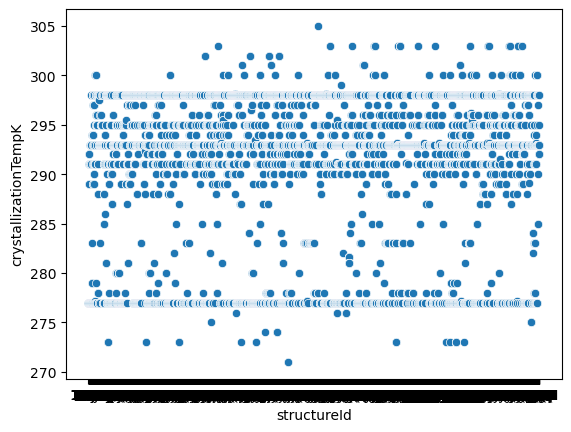

In [55]:
## Eliminating those points
model_f22 = model_f2.iloc[0:10000].copy()
threshold = 1
model_f22 = model_f22[(z < threshold)]

sns.scatterplot(x=model_f22.index,y=model_f22['crystallizationTempK'])


**It can be seen that the number of points displayed decreases as the value of Z decreases.
The closer you get to the average value, the less the middle of the distribution the less values are included.**